<a href="https://colab.research.google.com/github/franklinroosevelth/deep_learning/blob/main/exercice_reseau_neurones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importation des librairies
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers
from matplotlib import pyplot as plt

In [ ]:
# Charger les données MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


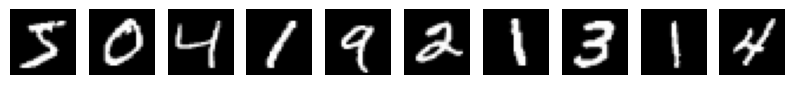

In [ ]:
# Afficher les images pour voir à quoi ça ressemble
# Créer une nouvelle figure de taille 10x1
plt.figure(figsize=(10,1))

# Boucler sur les 10 premières images de X_train
for i in range(10):
  # Ajoute un sous-plot dans une grille de 1 ligne par 10
  plt.subplot(1, 10, i+1)
  # Affiche l'image i de X_train en niveau de gris
  plt.imshow(X_train[i], cmap='gray')
  # Désactive les axes pour un affichage plus propres
  plt.axis('off')

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
# Construction du modèle de réseau de neurones
model = models.Sequential()

# Aplatissement des images 28x28 en un vecteur élément de 784 élément
# Le modèle de réseau de neurones denses nécessite un vecteur d'entrée de 1D
# donc nous devons aplatir les images 2D en un vecteur 1D.
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
# Optimiseur Adam pour ajuster les poids.
# Fonction de perte categorical_crossentropy pour mesurer la divergence entre les prédictions du modèle et les vraies étiquettes.
# Métrique d'exactitude pour évaluer la performance du modèle.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 8s 4ms/step - loss: 0.2749 - accuracy: 0.9188 - val_loss: 0.1579 - val_accuracy: 0.9544
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1152 - accuracy: 0.9654 - val_loss: 0.1026 - val_accuracy: 0.9696
Epoch 3/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0792 - accuracy: 0.9755 - val_loss: 0.1020 - val_accuracy: 0.9704
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0603 - accuracy: 0.9811 - val_loss: 0.0869 - val_accuracy: 0.9751
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0470 - accuracy: 0.9846 - val_loss: 0.0957 - val_accuracy: 0.9728
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0360 - accuracy: 0.9881 - val_loss: 0.0944 - val_accuracy: 0.9747
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0288 - accuracy: 0.9906 - val_loss: 0.0960 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'nTest accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.1348 - accuracy: 0.9781
nTest accuracy: 0.9781000018119812


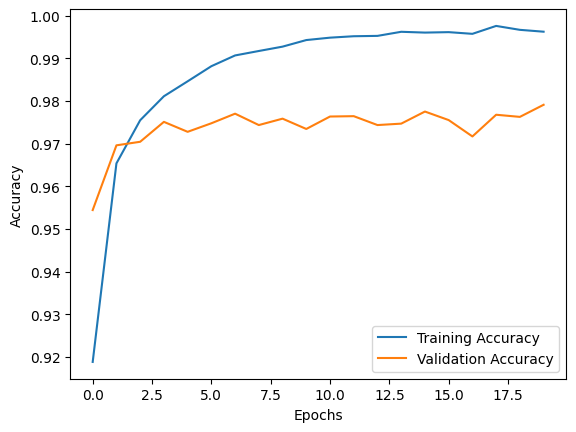

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

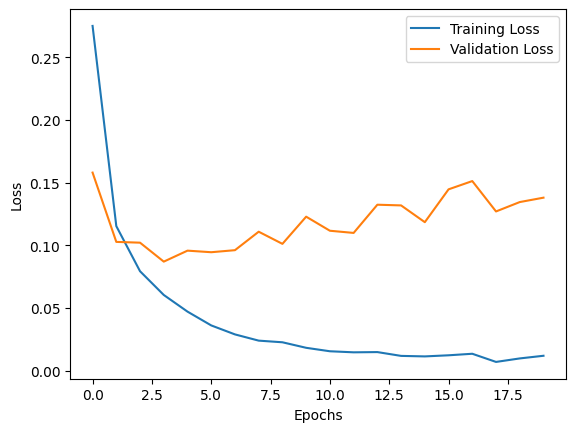

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Prédiction sur une nouvelle base de données
predictions = model.predict(X_test[:10])

1/1 [==============================] - 0s 128ms/step


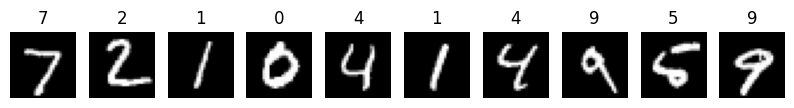

In [ ]:
# Affichage des prédictions pour les 10 premières images
plt.figure(figsize=(10, 1))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(X_test[i], cmap='gray')
  plt.title(np.argmax(predictions[i]))
  plt.axis('off')
plt.show()
